In [2]:
import sys
import os
sys.path.append(os.getcwd() + '/..')
import sib_ldsc_z as ld
import numpy as np
import matplotlib.pyplot as plt

nsim = 100
np.random.seed(123)
jkse_est = np.zeros((nsim, 3))
invhess_est = np.zeros((nsim, 3))
true_est = np.zeros((nsim, 3))

for i in range(nsim):
    
    print(f"Simulation number: {i}")
    
    # Simulating
    N = int(1e3)
    S = np.array([[[1e-4, -5 * 1e-5], [-5 * 1e-5, 1e-4]]] * N)
    V = np.array([[0.5, 0.25], [0.25, 0.5]])

    model = ld.sibreg(S = S)
    model.simdata(V/N, N, simld = True)

    # solving
    output, _ = model.solve(printout = False)
    
    true_est[i, :] = np.array([output['v1'], output['v2'], output['r']])
    invhess_est[i, :] = np.diag(output['std_err_mat'])
    jkse_est[i, :], _ = ld.jkse(model, 
                            {'v1' : output['v1'],
                            'v2' : output['v2'],
                            'r' : output['r']}, 
                            blocksize = int(N/100), 
                            num_procs=4,
                            rbounds = True)


Simulation number: 0
Warning there is no value for z. Maybe consider simulating it
No value for U given. Generating a vector of ones (all SNPs weighted equally)
No value for LD Scores given. Generating a vector of ones for l
No value for effective number of loci is given. Using total number of loci instead
Simulated LD scores!
Simulation number: 1
Warning there is no value for z. Maybe consider simulating it
No value for U given. Generating a vector of ones (all SNPs weighted equally)
No value for LD Scores given. Generating a vector of ones for l
No value for effective number of loci is given. Using total number of loci instead
Simulated LD scores!
Simulation number: 2
Warning there is no value for z. Maybe consider simulating it
No value for U given. Generating a vector of ones (all SNPs weighted equally)
No value for LD Scores given. Generating a vector of ones for l
No value for effective number of loci is given. Using total number of loci instead
Simulated LD scores!
Simulation nu

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


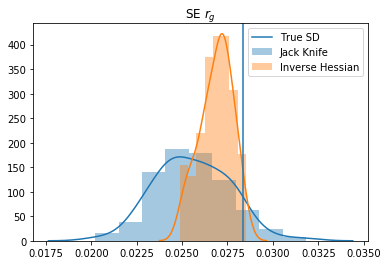

In [3]:
import seaborn as sns

sns.distplot(jkse_est[..., 2], label = "Jack Knife")
sns.distplot(invhess_est[..., 2], label = "Inverse Hessian")
plt.axvline(np.std(true_est[..., 2]), label = "True SD")
plt.title("SE $r_g$")
plt.legend()
plt.savefig("se_rg.png")

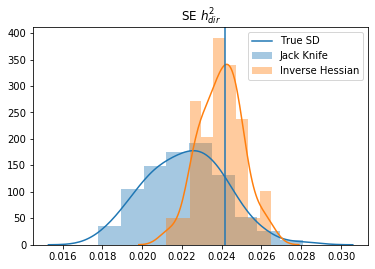

In [4]:
sns.distplot(jkse_est[..., 0], label = "Jack Knife")
sns.distplot(invhess_est[..., 0], label = "Inverse Hessian")
plt.axvline(np.std(true_est[..., 0]), label = "True SD")
plt.title("SE $h^2_{dir}$")
plt.legend()
plt.savefig("se_hdir.png")

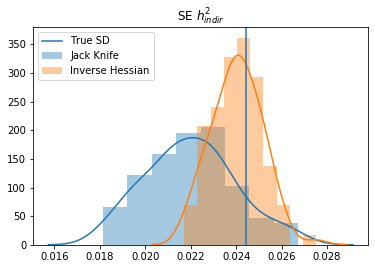

In [5]:
sns.distplot(jkse_est[..., 1], label = "Jack Knife")
sns.distplot(invhess_est[..., 1], label = "Inverse Hessian")
plt.axvline(np.std(true_est[..., 1]), label = "True SD")
plt.title("SE $h^2_{indir}$")
plt.legend()
plt.savefig("se_hindir.png")